In [23]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [24]:
## 1. Data Preparation
mb = pd.read_csv('Groceries data.csv')


In [25]:
mb.shape

(38765, 7)

In [26]:
mb.duplicated().sum()

759

In [27]:
mb.drop_duplicates(inplace=True)

In [28]:
# Extract the items for each transaction
transactions = mb.groupby(['Member_number','Date'])['itemDescription'].apply(list)
transactions.head()

Member_number  Date      
1000           2014-06-24                    [whole milk, pastry, salty snack]
               2015-03-15    [sausage, whole milk, semi-finished bread, yog...
               2015-05-27                           [soda, pickled vegetables]
               2015-07-24                       [canned beer, misc. beverages]
               2015-11-25                          [sausage, hygiene articles]
Name: itemDescription, dtype: object

In [29]:
# Apply one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:

frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)

In [31]:
#rules = association_rules(frequent_itemsets, metric="lift")

In [37]:
# Sort the rules by lift in descending order and select the top 10
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

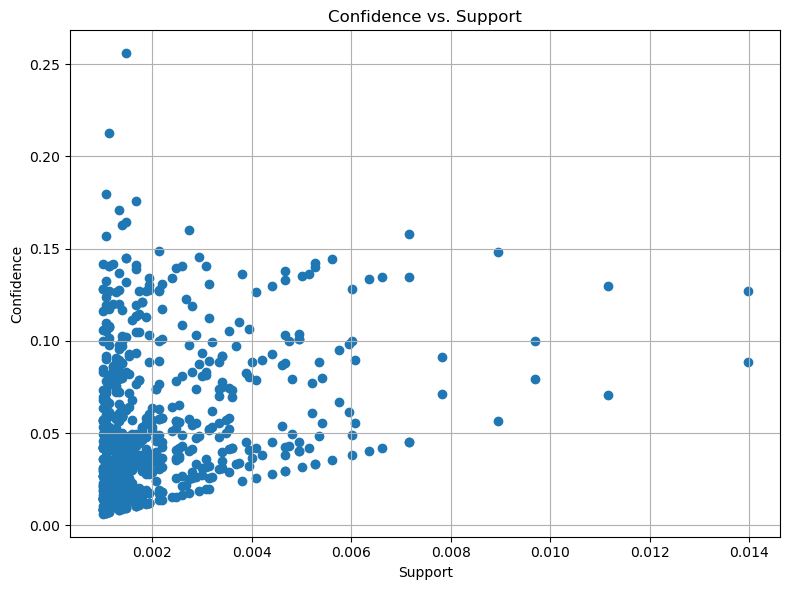

In [33]:
# Confidence vs. Support
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs. Support')
plt.grid(True)
plt.tight_layout()
plt.show()

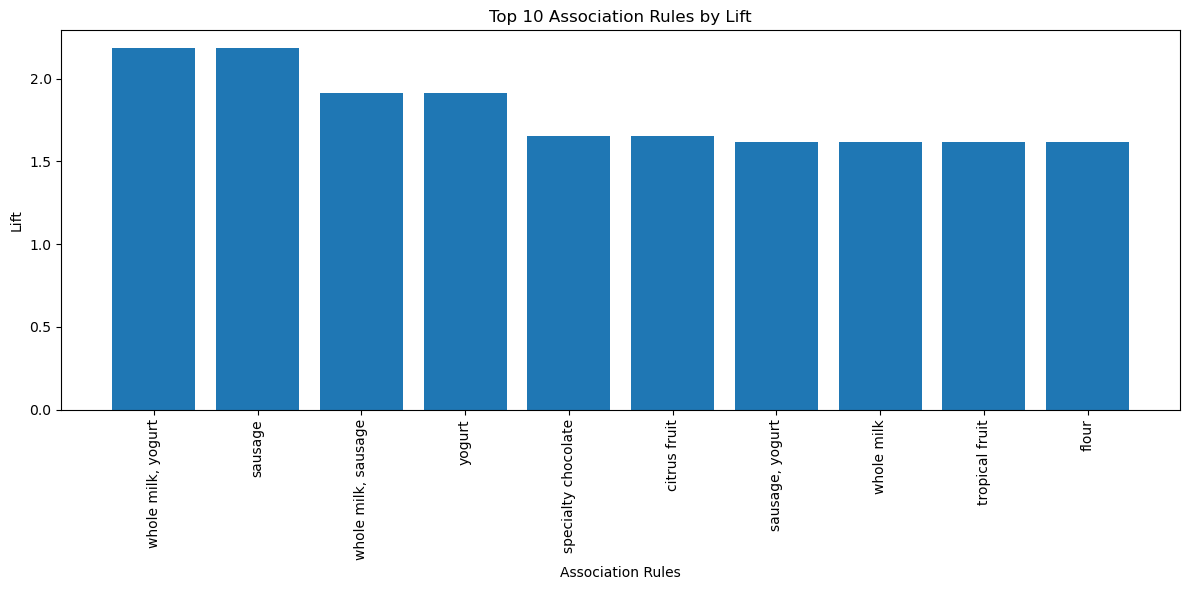

In [39]:
# Create the visualization for the top 10 rules
plt.figure(figsize=(12, 6))
plt.bar(top_rules['antecedents'].apply(lambda x: ', '.join(list(x))),
        top_rules['lift'])
plt.xticks(rotation=90)
plt.xlabel('Association Rules')
plt.ylabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.tight_layout()
plt.show()

In [40]:
rules=rules.sort_values(by="support", ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
622,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
623,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
695,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
694,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
551,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
...,...,...,...,...,...,...,...,...,...,...
216,(chicken),(domestic eggs),0.027869,0.037091,0.001002,0.035971,0.969797,-0.000031,0.998838,-0.031042
616,(rolls/buns),(soft cheese),0.110005,0.010025,0.001002,0.009113,0.909052,-0.000100,0.999080,-0.101053
304,(rolls/buns),(detergent),0.110005,0.008621,0.001002,0.009113,1.057037,0.000054,1.000496,0.060629
305,(detergent),(rolls/buns),0.008621,0.110005,0.001002,0.116279,1.057037,0.000054,1.007100,0.054429


In [ ]:
# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets